In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
PATH = '../data/mouse_latency_data'
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['FLTK_default.csv',
 'gtk_default.csv',
 'Java2D_default.csv',
 'pygame_default.csv']

In [31]:
data_files = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    data_in = data_in[['start_time', 'click_time']]
    data_in = data_in.drop(index=0)
    data_files.append(data_in)
    
data = pd.concat(data_files)

In [32]:
data['diff'] = data['start_time'] - data['click_time']
data

,start_time,click_time,diff
1,4801681400,4801680170,1230
2,4802914365,4802913524,841
3,4804529346,4804527906,1440
4,4805644331,4805643136,1195
5,4806906349,4806904999,1350
...,...,...,...
96,5076469691,5076468563,1128
97,5077902676,5077901609,1067
98,5079621685,5079620599,1086
99,5080966658,5080965628,1030


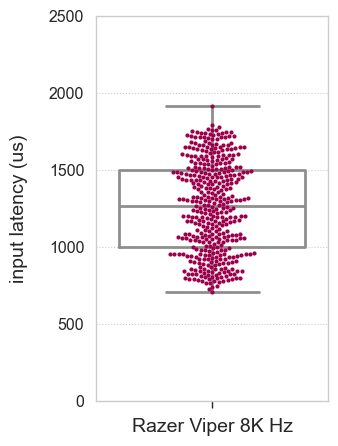

In [38]:
COLOR_NONE = '#8E8E8D'
COLOR_HEIDENELKE = '#9C004B'

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(3, 5), "xtick.bottom": True, "grid.linestyle": ":"})
plot = sns.boxplot(data['diff'], color=COLOR_NONE, linewidth=2, fill=False)
plot = sns.swarmplot(data['diff'], color=COLOR_HEIDENELKE, size=3)
plot.set_ylim(bottom=0, top=2500)
plot.set_ylabel('input latency (us)', labelpad=15, fontsize=14)
plot.set_xlabel('Razer Viper 8K Hz', fontsize=14)
plt.savefig("../analysis/figures/mouse_latency.pdf", format='pdf', bbox_inches='tight')

In [35]:
len(data['diff'])

400

In [34]:
mean = data['diff'].mean()
median = data['diff'].median()
std = data['diff'].std()

print(mean)
print(median)
print(std)

1257.8825
1262.5
294.56161504240663
